# **Neural Networks Assignment**

# **Assignment 16(b)**

# **2.Gas Turbines Dataset(gas_turbines.csv)**

In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 import warnings
 warnings.filterwarnings('ignore')

 import tensorflow as tf
 from tensorflow import keras
 from keras.models import Sequential
 from keras.layers import Dense
 from keras.layers import Dropout
 from keras.optimizers import Adam
 from tensorflow.keras.optimizers import Adam

# **Import Dataset**

In [2]:
gas=pd.read_csv('gas_turbines.csv')
gas.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [3]:
gas_copy=gas.copy()

# **EDA**

**Descriptive Analysis**

In [4]:
gas.shape

(15039, 11)

In [5]:
#checking missing values
(gas.isna().sum())/len(gas)*100

AT      0.0
AP      0.0
AH      0.0
AFDP    0.0
GTEP    0.0
TIT     0.0
TAT     0.0
TEY     0.0
CDP     0.0
CO      0.0
NOX     0.0
dtype: float64

In [6]:
gas.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [7]:
#checking duplicates
(gas.duplicated().sum())

0

In [8]:
gas[gas.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

In [9]:
#checking datatypes
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [10]:
#describes
gas.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [11]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [12]:
gas.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [13]:
#Feature Analysis

In [14]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [15]:
gas.head(3)

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468

In [16]:
gas.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [17]:
#TEY is dependent feature.So this is the feature we have to predict.

# **Correlation**

In [18]:
gas.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

# **Visualization**

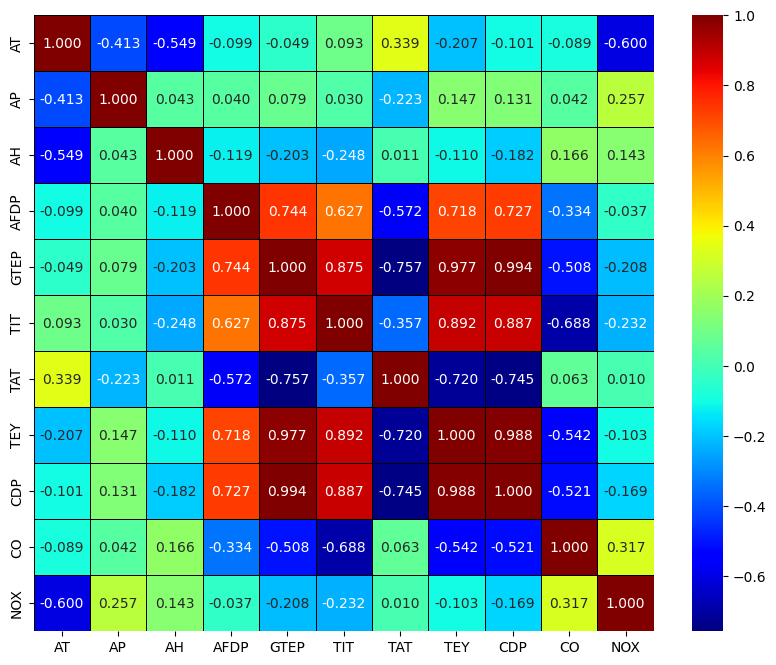

In [19]:
#heat map
plt.figure(figsize=(10,8))
sns.heatmap(gas.corr(),annot=True,cmap='jet',fmt='.3f',linewidth=0.5,linecolor='black')
plt.show()

<Figure size 700x500 with 0 Axes>

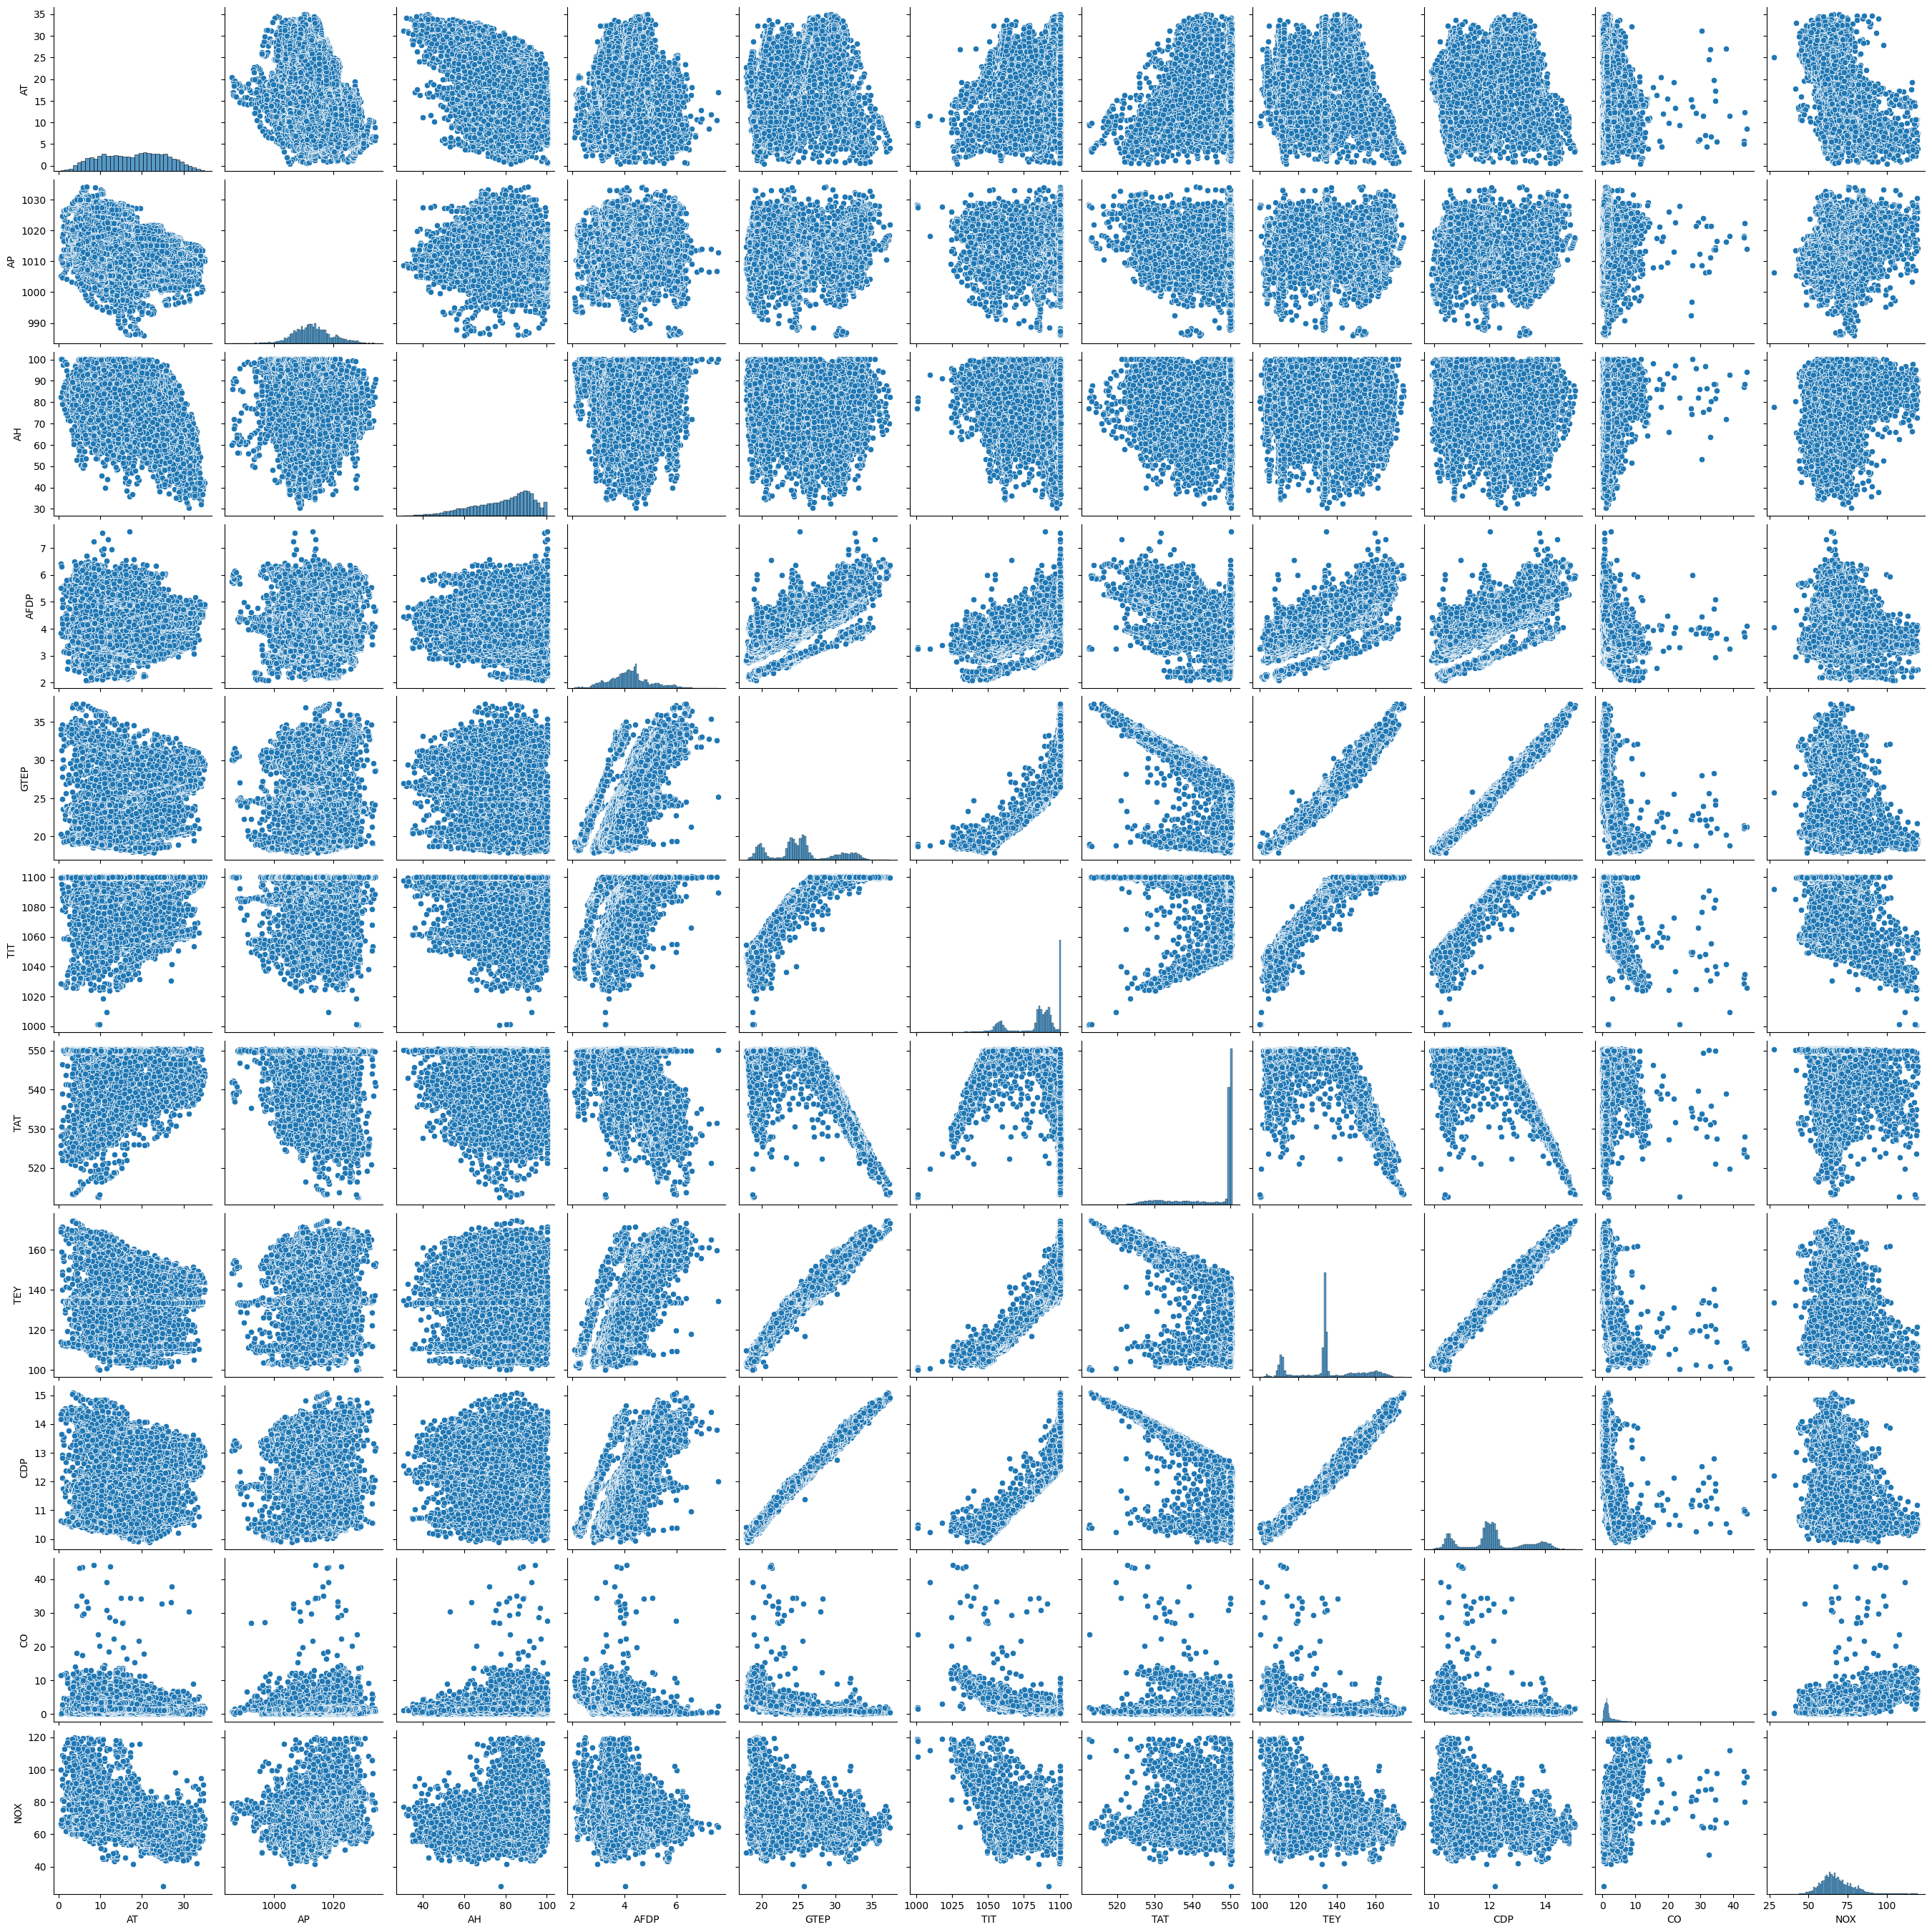

In [20]:
#pairplot
plt.figure(figsize=(7,5))
sns.pairplot(gas)
plt.show()

# **Univariate Plot**

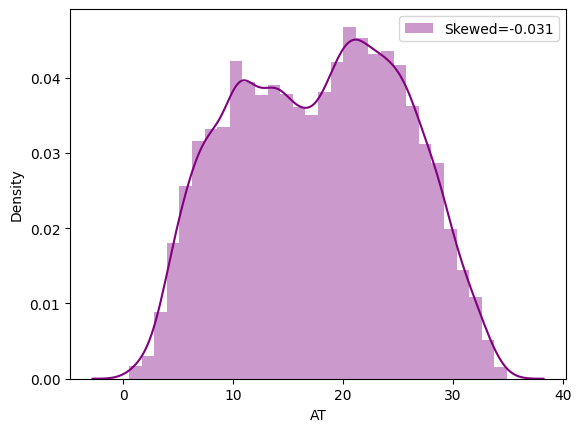

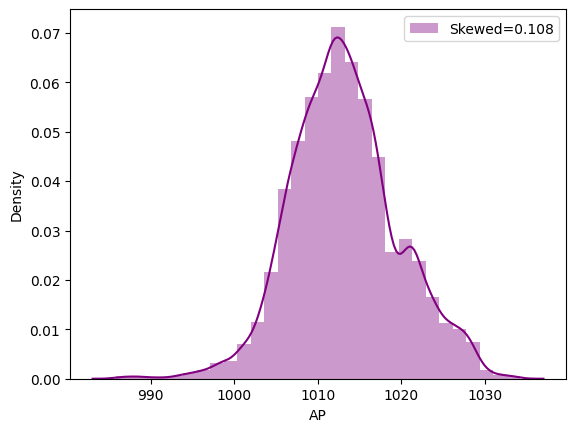

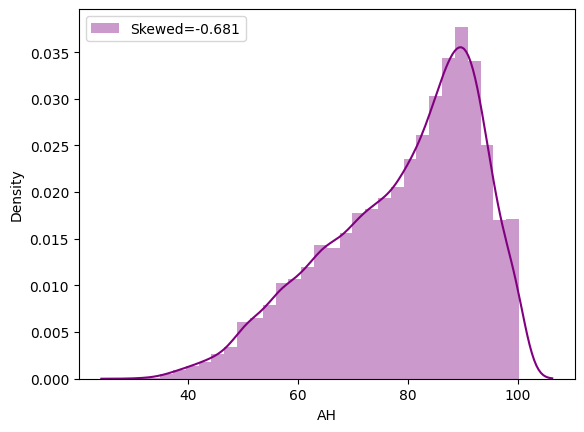

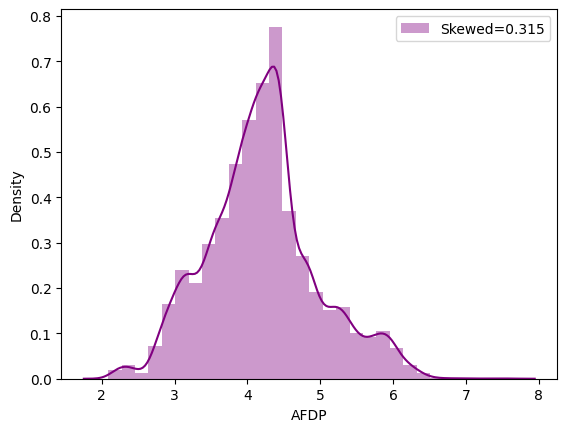

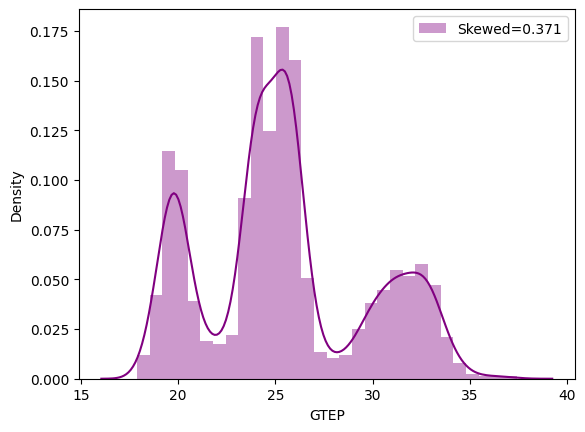

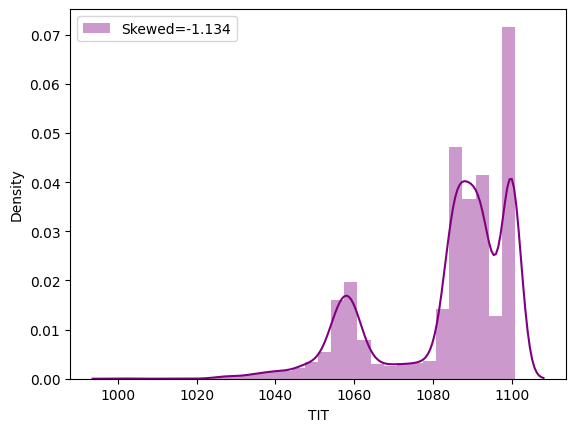

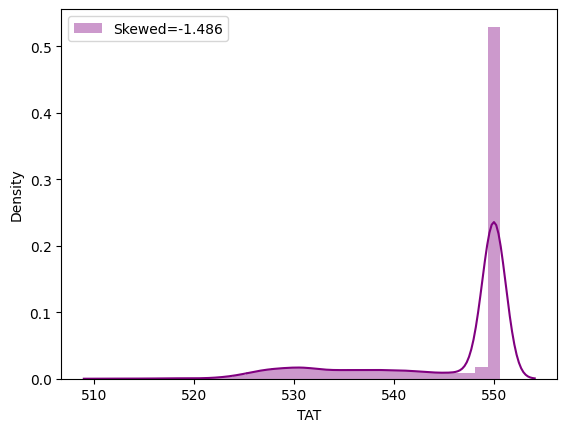

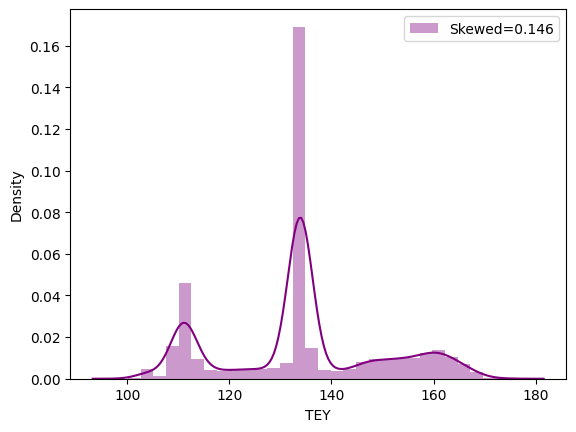

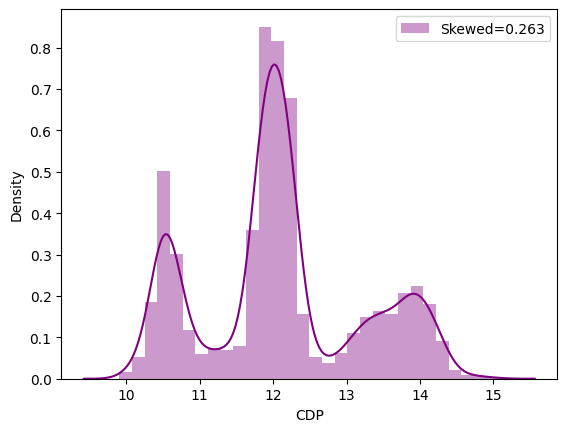

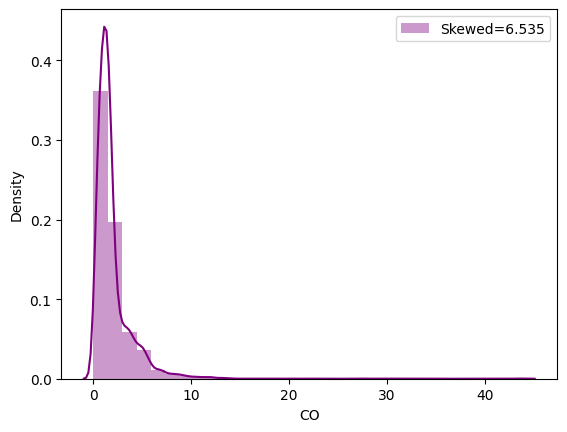

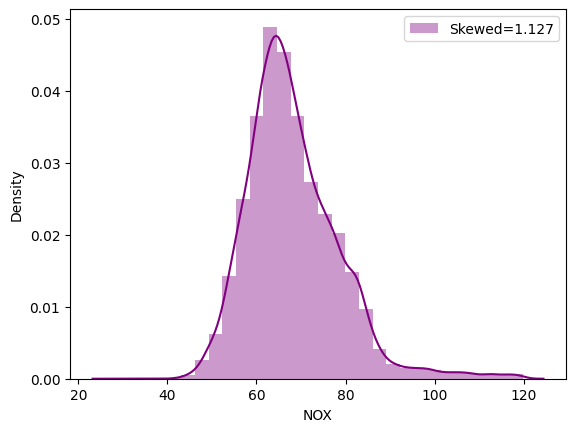

In [21]:
#univariate plot
for f in gas:
  skew=gas[f].skew()
  sns.distplot(gas[f],label='Skewed=%.3f'%(skew),bins=30,color='purple')
  plt.legend()
  plt.show()

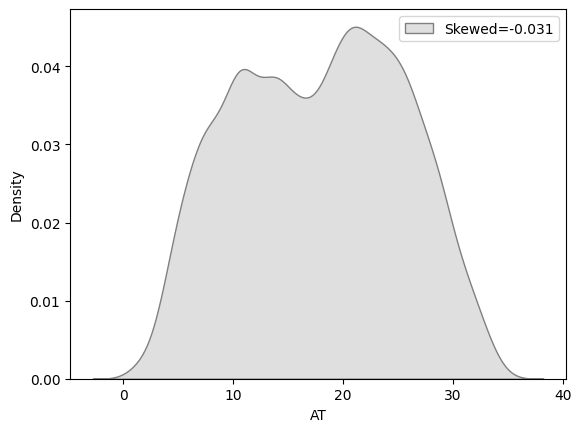

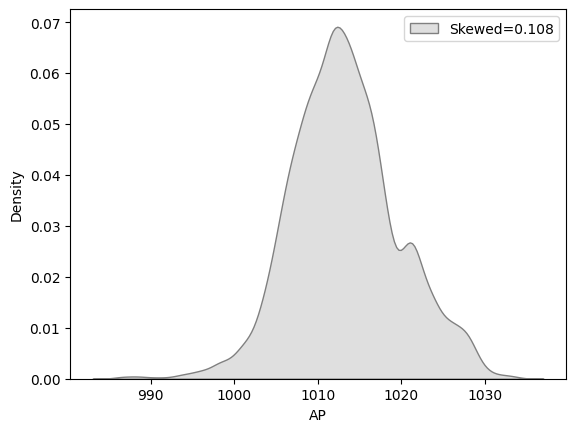

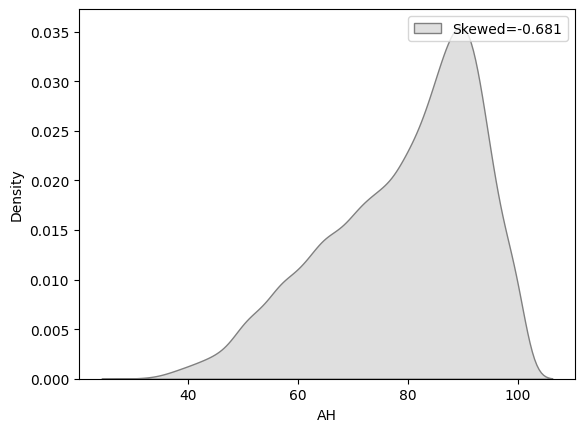

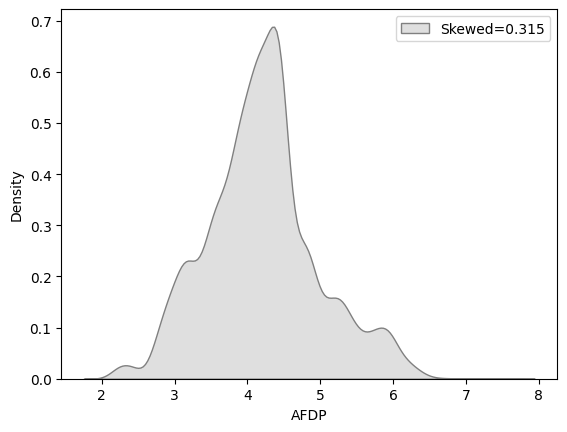

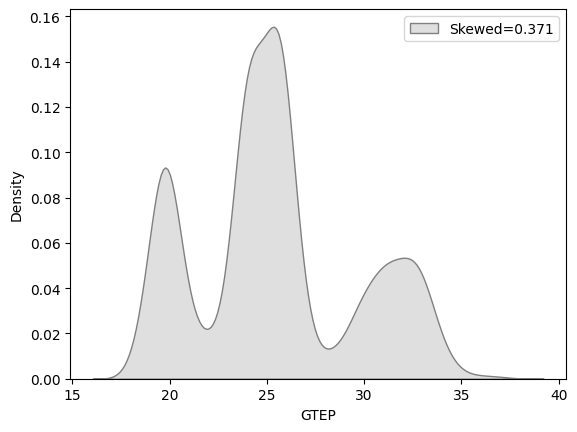

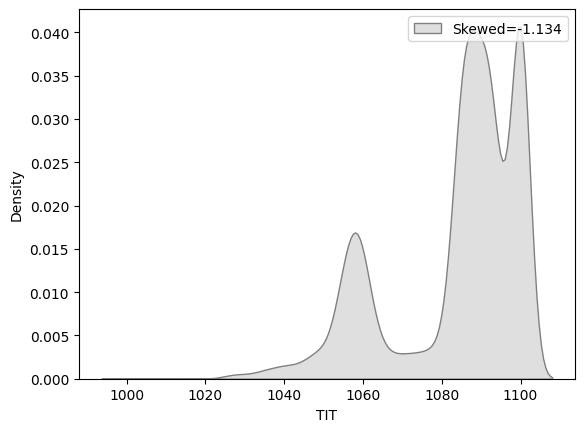

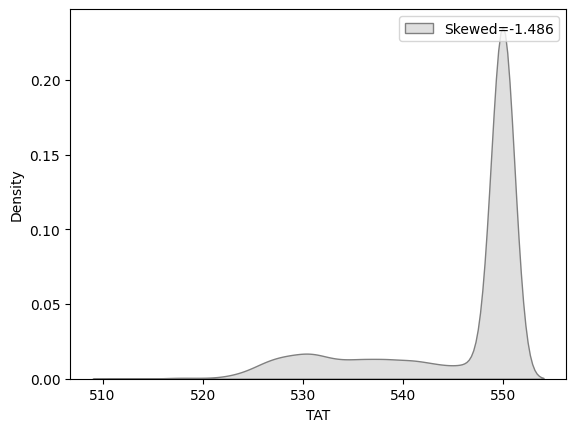

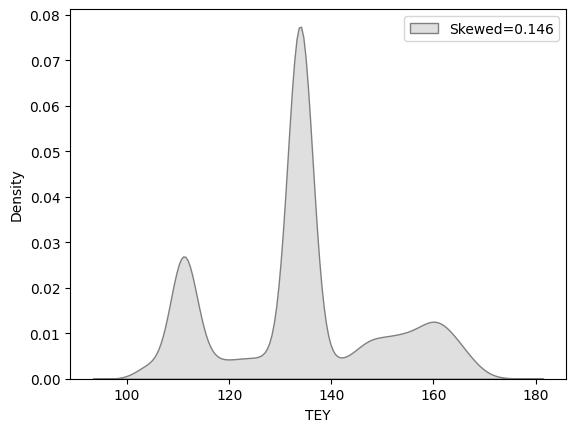

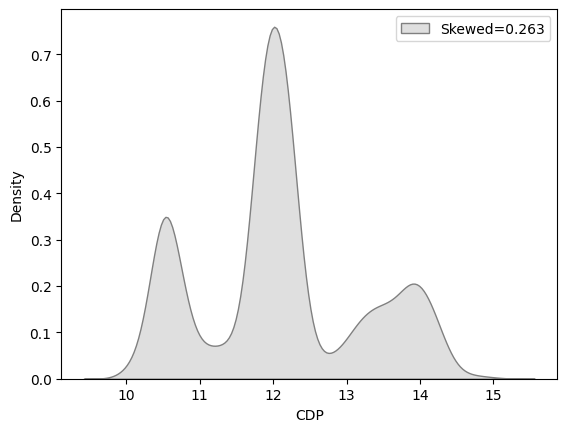

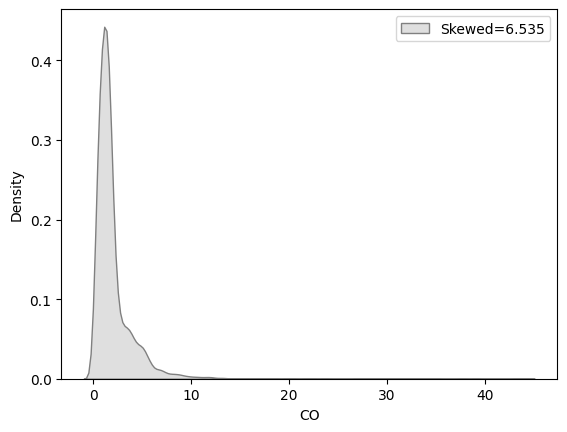

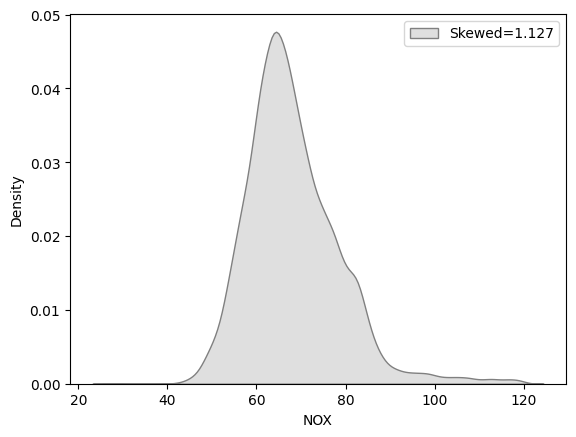

In [22]:
#kde plot
for f in gas:
  skew=gas[f].skew()
  sns.kdeplot(gas[f],label='Skewed=%.3f'%(skew),color='gray',shade=True)
  plt.legend()
  plt.show()

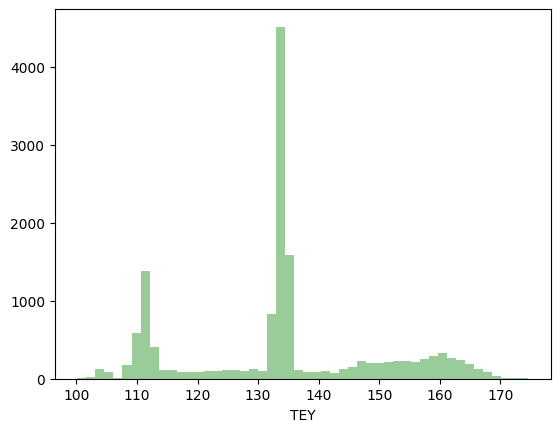

In [23]:
#distplot for Tey feature:
sns.distplot(gas['TEY'],color='green',kde=False)
plt.show()

<Axes: xlabel='TEY', ylabel='Density'>

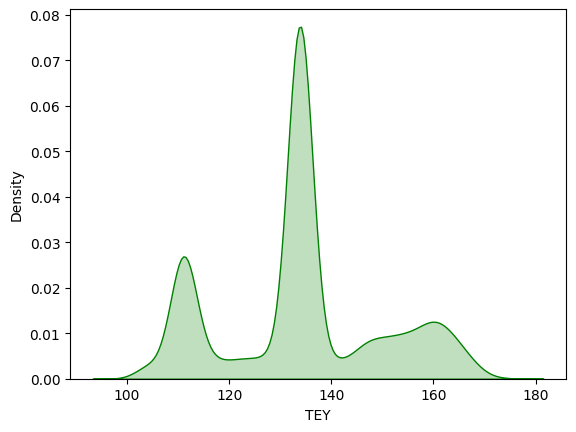

In [24]:
#kdeplot
sns.kdeplot(gas['TEY'],color='green',shade=True)

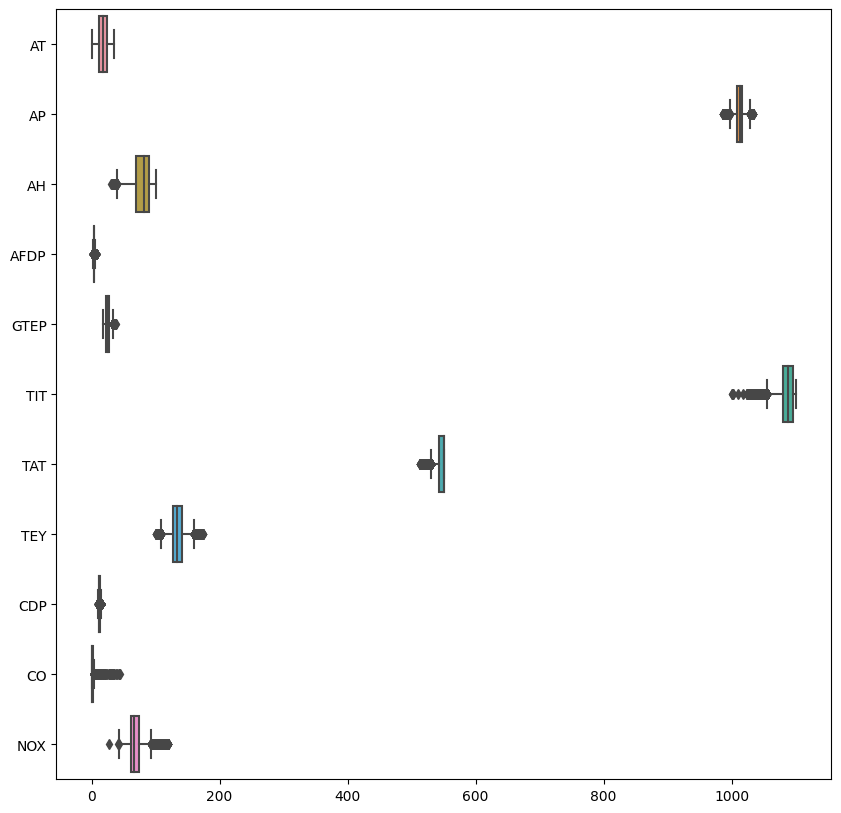

In [25]:
#detecting outliers
#boxplot
plt.figure(figsize=(10,10))
sns.boxplot(gas,orient='h')
plt.show()

# **Histogram**

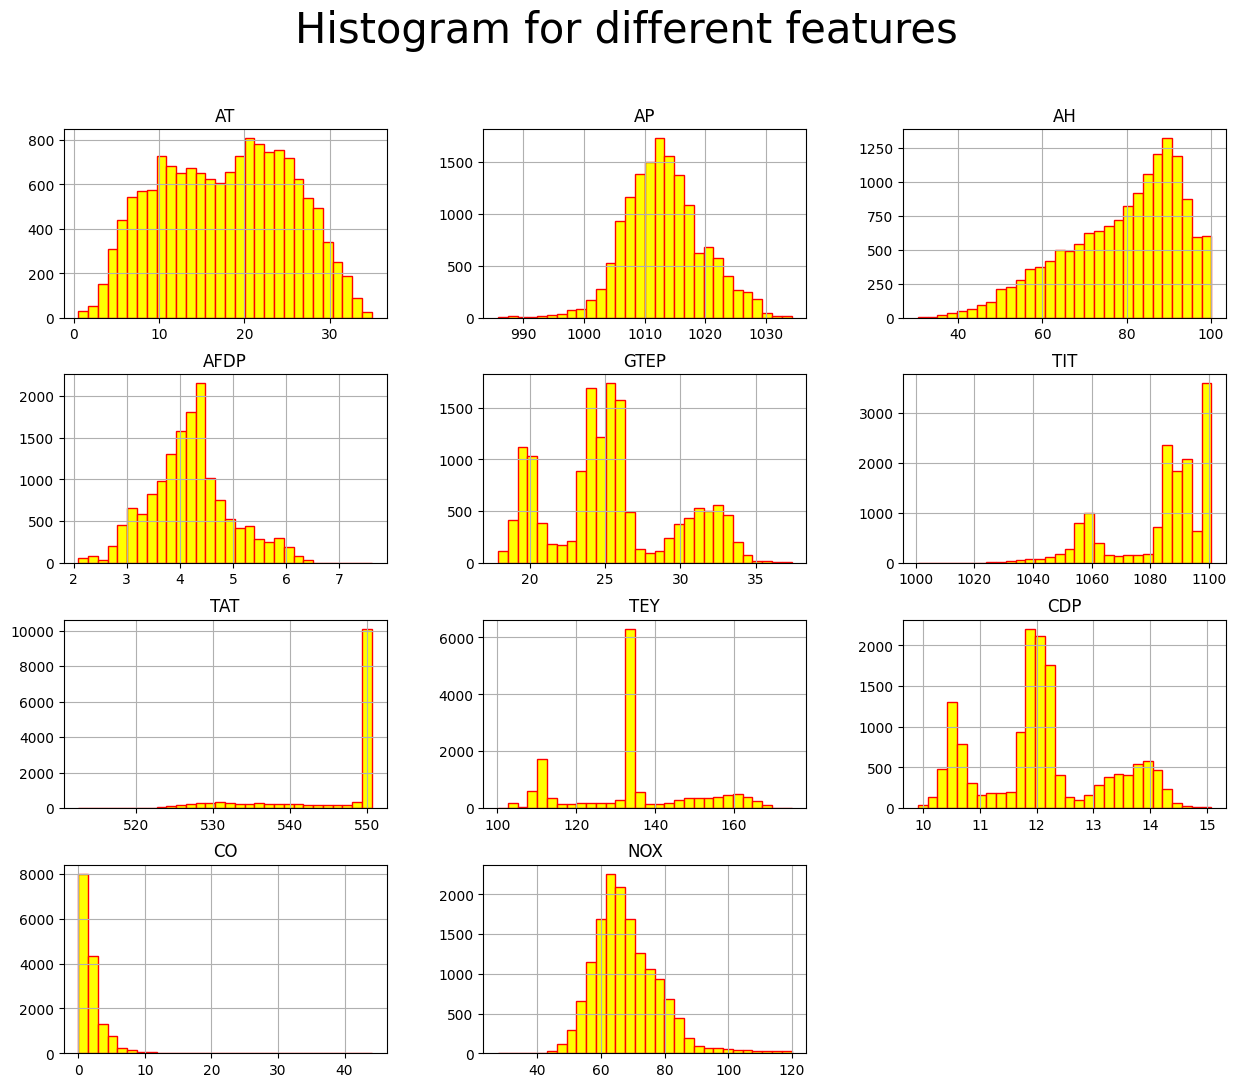

In [26]:
#histogram for different features
gas.hist(bins=30,figsize=(15,12),rwidth=1,color='yellow',edgecolor='red')
plt.suptitle('Histogram for different features',ha='center',fontsize=30)
plt.show()

# **BiVariate Analysis**

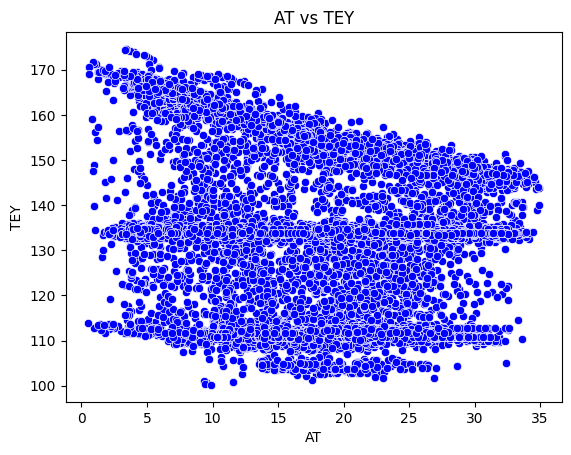

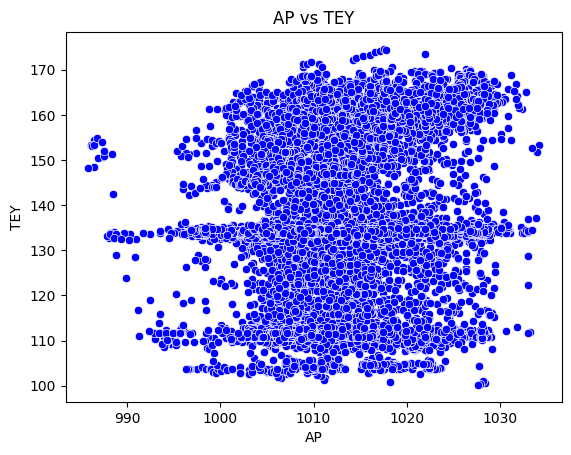

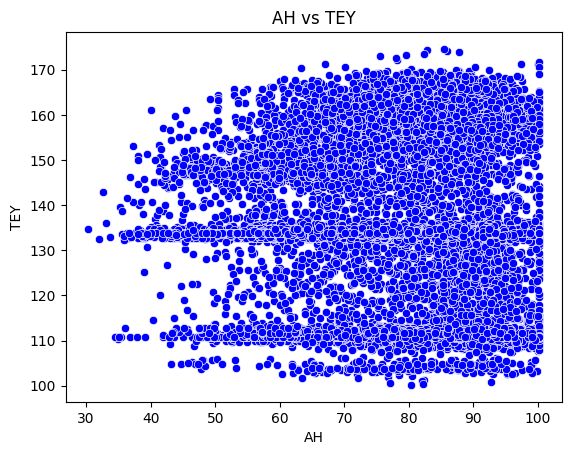

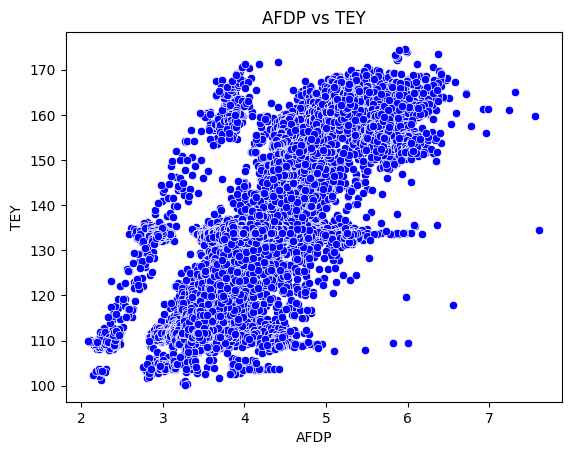

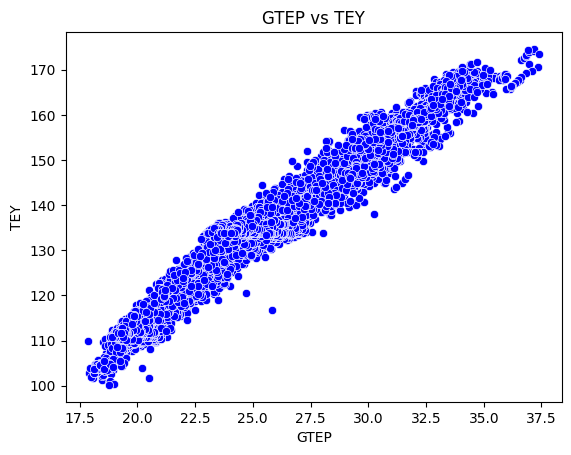

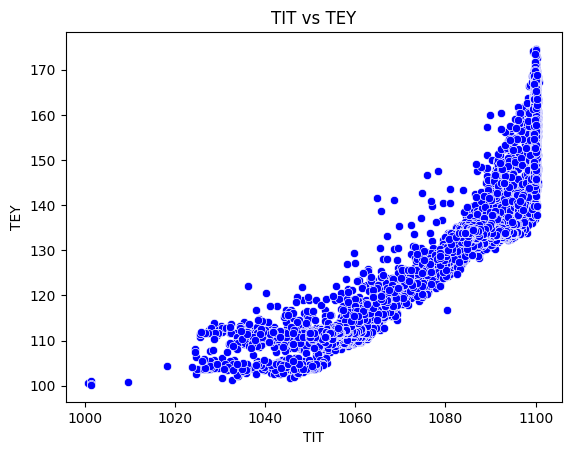

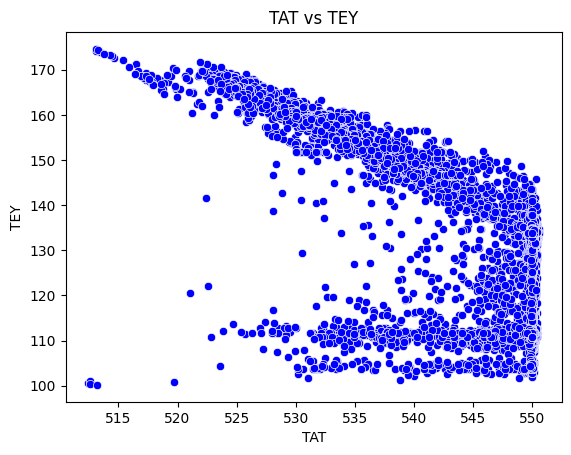

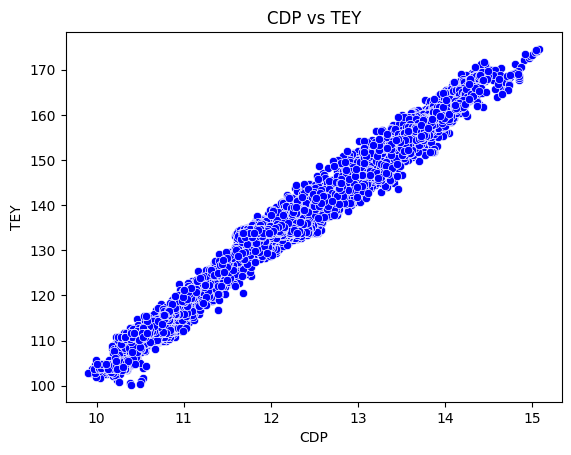

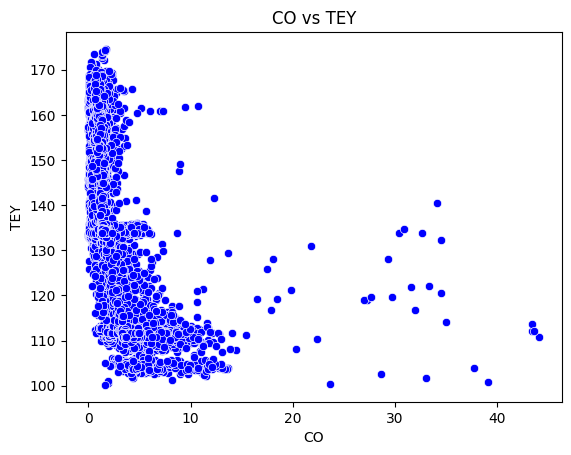

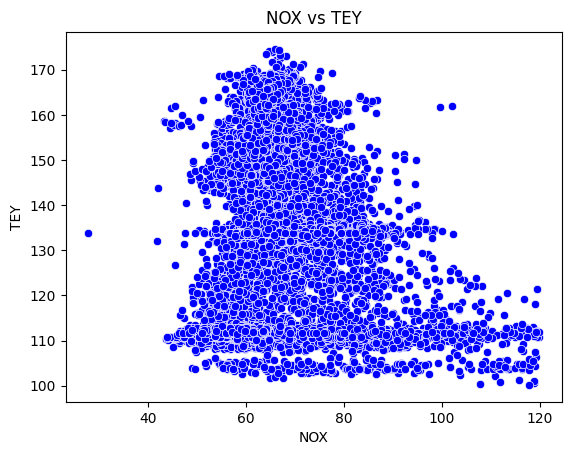

In [27]:
#bivariate analysis
#scatter plot of all features vs TEY
for f in gas:
  if f!='TEY':
    sns.scatterplot(x=f,y='TEY',data=gas,color='blue')
    plt.title(f+' vs TEY')
    plt.show()

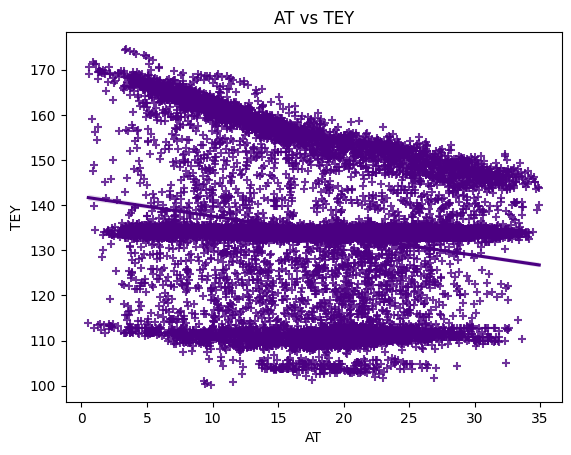

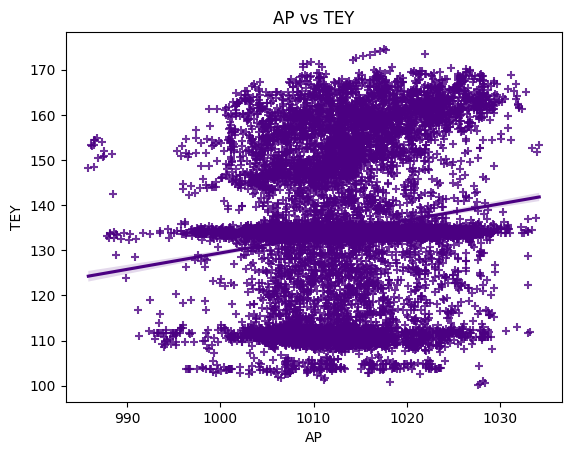

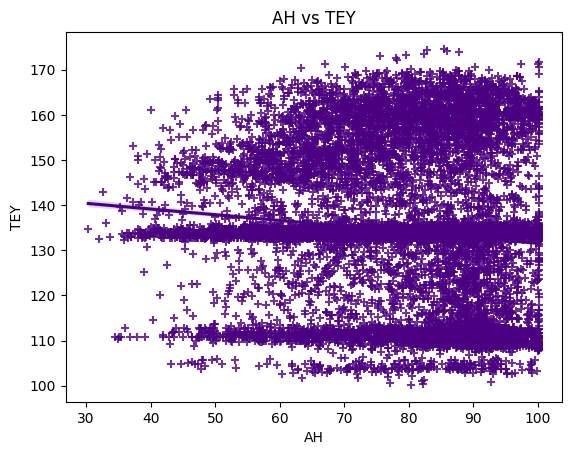

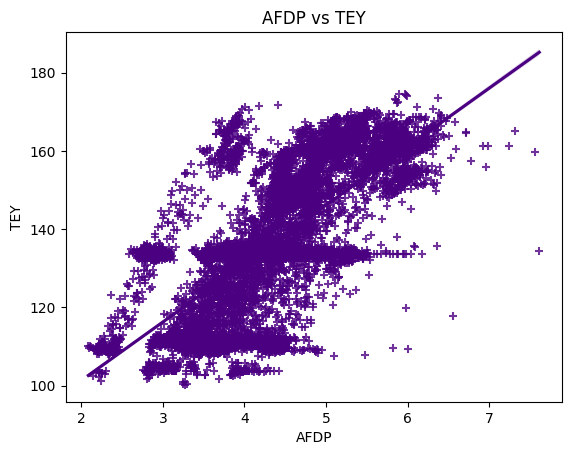

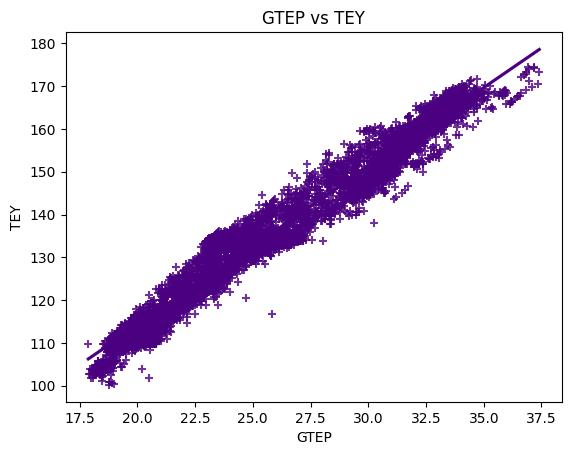

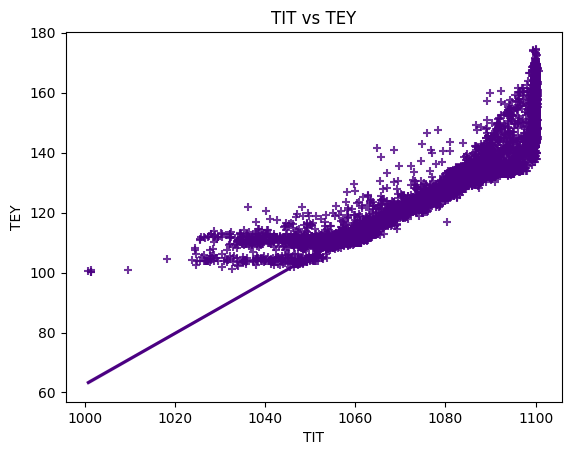

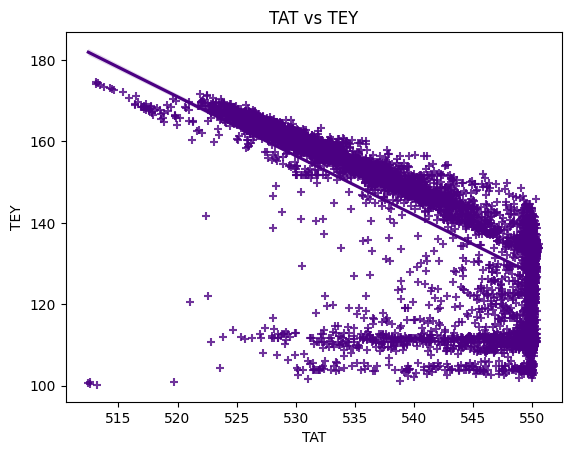

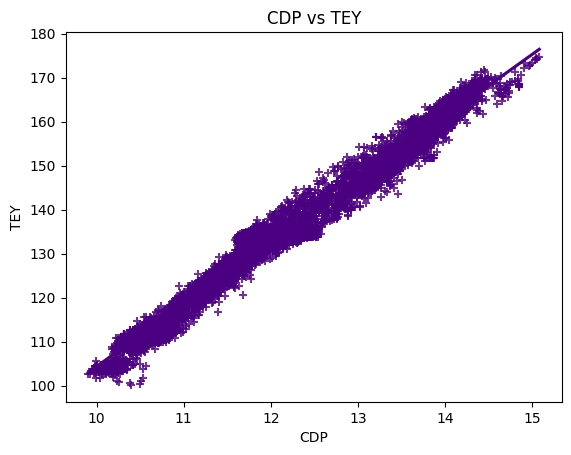

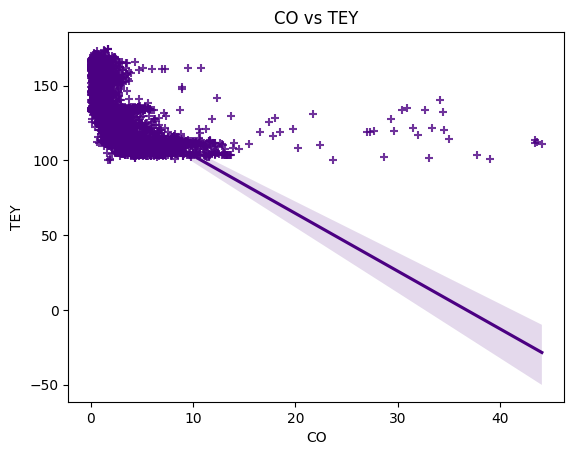

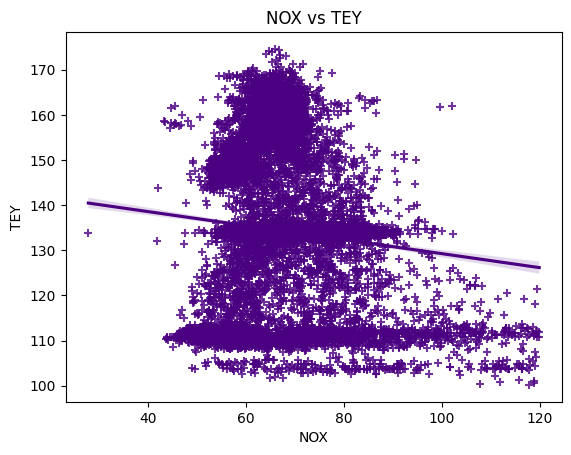

In [28]:
#regression plot
for f in gas:
  if f!='TEY':
    sns.regplot(x=f,y='TEY',data=gas,color='indigo',marker='+')
    plt.title(f+' vs TEY')
    plt.show()

<Axes: >

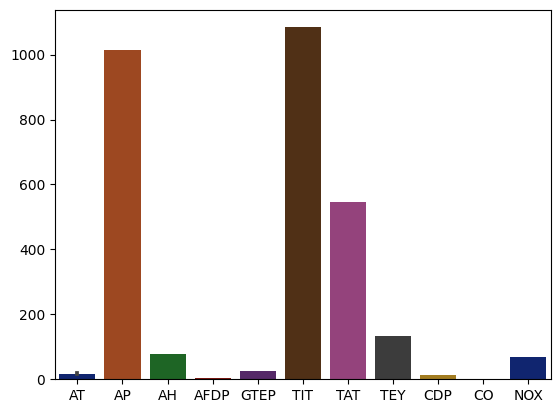

In [29]:
#bar plot of all features
sns.barplot(gas,palette='dark')

Text(0.5, 1.0, 'Correlations of Gas Turbines')

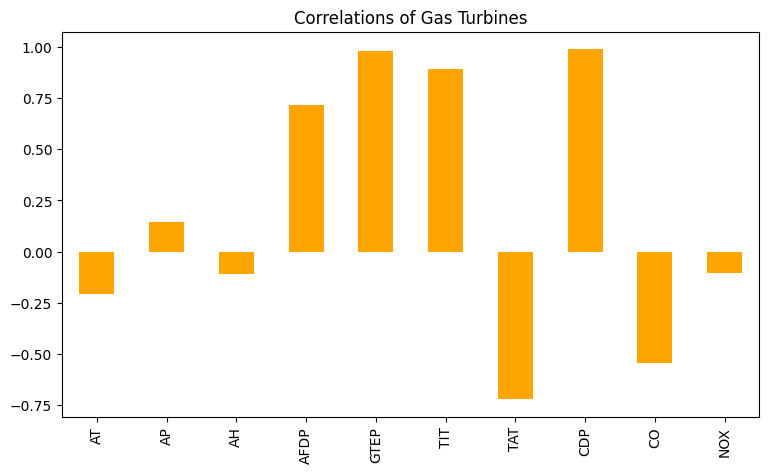

In [30]:
#correlation showing bar graph
correlations=gas_copy.corrwith(gas.TEY)
correlations=correlations[correlations!=1]
pos_corr=correlations[correlations>0].sort_values(ascending=False)
neg_corr=correlations[correlations<0].sort_values(ascending=False)
correlations.plot.bar(color='orange',figsize=(9,5))
plt.title('Correlations of Gas Turbines')

**spliting into x and y**

In [31]:
x=gas.drop('TEY',axis=1)
y=gas['TEY']

# **Features Selection**

In [32]:
#select important features

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_regression

In [34]:
test=SelectKBest(score_func=mutual_info_regression,k=5)
test.fit(x,y)

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x795dd87b9ab0>)

In [35]:
test.scores_

array([0.412677  , 0.13752274, 0.09775578, 0.66106275, 1.59990592,
       1.32578196, 0.89460583, 1.71155583, 0.51265123, 0.29990255])

In [36]:
scores=pd.DataFrame({'features':x.columns,'scores':test.scores_})
scores.sort_values(by='scores',ascending=False,inplace=True)

In [37]:
scores

features    scores
7      CDP  1.711556
4     GTEP  1.599906
5      TIT  1.325782
6      TAT  0.894606
3     AFDP  0.661063
8       CO  0.512651
0       AT  0.412677
9      NOX  0.299903
1       AP  0.137523
2       AH  0.097756

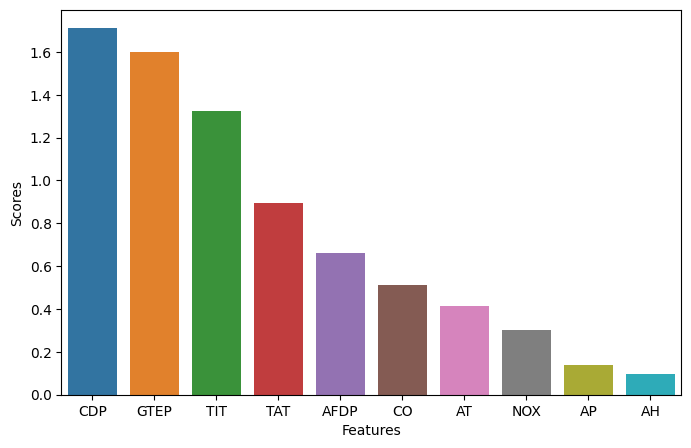

In [39]:
#bar plot for features and scores
plt.figure(figsize=(8,5))
sns.barplot(x='features',y='scores',data=scores)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

In [40]:
#creating DataFrame with important features

In [41]:
gas_df=gas[['CDP','GTEP','TIT','TAT','AFDP','CO','AT','TEY']]
gas_df.head()

CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72

In [42]:
#TEY is dependent feature

# **Feature Scaling**

In [43]:
#we have to perform feature scaling to reduce the scale of the features

In [44]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()

In [45]:
gas_df.iloc[:,:]=sc.fit_transform(gas_df.iloc[:,:])

In [46]:
gas_df

CDP      GTEP       TIT       TAT      AFDP        CO        AT  \
0     -1.357331 -1.379101 -1.488376  0.585240 -0.921232  0.532012 -1.439778   
1     -1.363676 -1.363528 -1.482325  0.585240 -0.921495  0.568733 -1.449601   
2     -1.360957 -1.351309 -1.476275  0.568715 -0.944385  0.552938 -1.434721   
3     -1.356424 -1.348194 -1.464173  0.583969 -0.946884  0.548933 -1.413702   
4     -1.350985 -1.354663 -1.458123  0.582698 -0.924389  0.574179 -1.368693   
...         ...       ...       ...       ...       ...       ...       ...   
15034 -1.543161 -1.498657 -2.063184  0.103453 -0.865850  1.145792 -1.153182   
15035 -1.513247 -1.438759 -2.268905 -0.276638 -0.913470  1.293578 -1.303986   
15036 -1.467922 -1.410967 -2.789257 -1.026650 -0.951488  2.695925 -1.386267   
15037 -1.422598 -1.447624 -2.456474 -0.528337 -0.988848  1.924683 -1.420423   
15038 -1.377273 -1.464635 -2.051083  0.057689 -1.016605  1.354150 -1.430734   

            TEY  
0     -1.231172  
1     -1.229909  
2     -1.230541  
3     -1.229909  
4     -1.229909  
...         ...  
15034 -1.426381  
15035 -1.415642  
15036 -1.516089  
15037 -1.481343  
15038 -1.428277  

[15039 rows x 8 columns]

**spliting into x and y for model building**

In [47]:
x=gas_df.iloc[:,:-1]
y=gas_df.iloc[:,-1]

# **Training and Testing**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=18)

In [50]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(10527, 7)
(10527,)
(4512, 7)
(4512,)


# **Neural Networks Model Building**

In [51]:
#importing neural networks
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import r2_score

In [52]:
#create model
model=Sequential()
model.add(Dense(128,input_dim=7,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

In [53]:
#compile model
adam=Adam(learning_rate=0.0015)
model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae'])

In [54]:
#fitting the model
fit=model.fit(xtrain,ytrain,validation_split=0.2,batch_size=50,epochs=100)

Epoch 1/100
169/169 [==============================] - 2s 5ms/step - loss: 0.0515 - mae: 0.0922 - val_loss: 0.0027 - val_mae: 0.0383
Epoch 2/100
169/169 [==============================] - 1s 3ms/step - loss: 0.0039 - mae: 0.0391 - val_loss: 0.0120 - val_mae: 0.0607
Epoch 3/100
169/169 [==============================] - 1s 4ms/step - loss: 0.0027 - mae: 0.0362 - val_loss: 0.0018 - val_mae: 0.0301
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 0.0019 - mae: 0.0313 - val_loss: 0.0017 - val_mae: 0.0289
Epoch 5/100
169/169 [==============================] - 1s 4ms/step - loss: 0.0018 - mae: 0.0301 - val_loss: 0.0017 - val_mae: 0.0291
Epoch 6/100
169/169 [==============================] - 1s 4ms/step - loss: 0.0017 - mae: 0.0294 - val_loss: 0.0020 - val_mae: 0.0323
Epoch 7/100
169/169 [==============================] - 1s 4ms/step - loss: 0.0019 - mae: 0.0309 - val_loss: 0.0016 - val_mae: 0.0288
Epoch 8/100
169/169 [==============================] - 1s 4ms/step - 

In [55]:
#evaluate values for training data
score_train=model.evaluate(xtrain,ytrain)
print(model.metrics_names[1],':',score_train[1])
print(model.metrics_names[0],':',score_train[0])

329/329 [==============================] - 1s 2ms/step - loss: 0.0011 - mae: 0.0241
mae : 0.024148013442754745
loss : 0.001115744817070663


In [56]:
#evaluate values for testing data
score_test=model.evaluate(xtest,ytest)
print(model.metrics_names[1],':',score_test[1])
print(model.metrics_names[0],':',score_test[0])

141/141 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0264
mae : 0.02635946311056614
loss : 0.0013947664992883801


In [57]:
#list of all data in history
fit.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [58]:
#DataFrame for history
epochs=pd.DataFrame({'epochs':fit.epoch})
history=pd.DataFrame(fit.history)
fit_df=pd.concat([epochs,history],axis=1)
fit_df

epochs      loss       mae  val_loss   val_mae
0        0  0.051503  0.092200  0.002729  0.038256
1        1  0.003888  0.039123  0.012037  0.060737
2        2  0.002737  0.036153  0.001799  0.030138
3        3  0.001895  0.031317  0.001672  0.028942
4        4  0.001793  0.030109  0.001654  0.029148
..     ...       ...       ...       ...       ...
95      95  0.001155  0.024569  0.001596  0.029248
96      96  0.001070  0.023745  0.001247  0.024528
97      97  0.001130  0.024340  0.001265  0.024818
98      98  0.001108  0.024040  0.001491  0.026586
99      99  0.001176  0.024773  0.001390  0.026259

[100 rows x 5 columns]

In [59]:
#visualization on training history

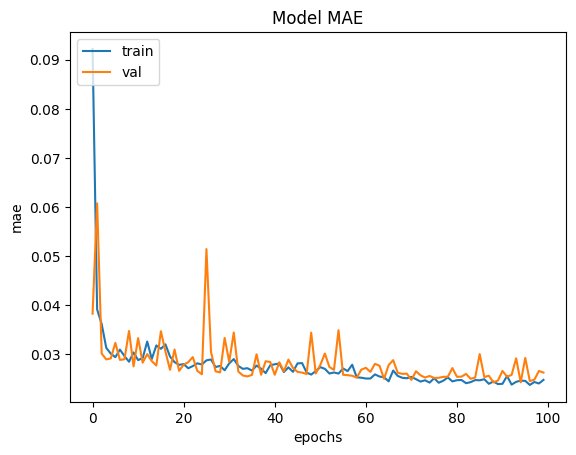

In [60]:
#summarize history of mae(mean absolute error)
plt.plot(fit.history['mae'])
plt.plot(fit.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend(['train','val'],loc='upper left')
plt.show()

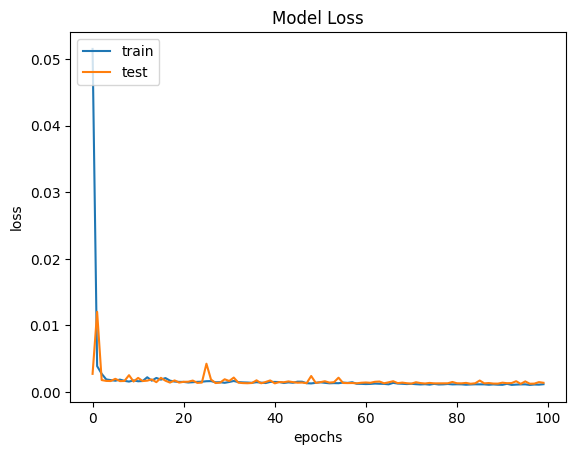

In [61]:
#summarize of history of loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [62]:
print('Training data','--->>','%s:%.2f%%'%(model.metrics_names[1],score_train[1]))
print('Testing data','--->>','%s:%.2f%%'%(model.metrics_names[1],score_test[1]))

Training data --->> mae:0.02%
Testing data --->> mae:0.03%


In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11393 (44.50 KB)
Trainable params: 11393 (44.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
#prediction
ypred=model.predict(xtest)
print('Accuracy',':',r2_score(ytest,ypred))

141/141 [==============================] - 0s 2ms/step
Accuracy : 0.9985744940166235


# **Take small sample to build our models**

In [65]:
#As our model is extremely large so we can't perform on the large data.
#If we take the complete large data for building the models it will take lot of time to execute it

In [66]:
#So due to this we are taking small sample from our large complete dataset for model building

In [67]:
#complete data, now take shuffle from this data for model building
gas_df.head()

CDP      GTEP       TIT       TAT      AFDP        CO        AT  \
0 -1.357331 -1.379101 -1.488376  0.585240 -0.921232  0.532012 -1.439778   
1 -1.363676 -1.363528 -1.482325  0.585240 -0.921495  0.568733 -1.449601   
2 -1.360957 -1.351309 -1.476275  0.568715 -0.944385  0.552938 -1.434721   
3 -1.356424 -1.348194 -1.464173  0.583969 -0.946884  0.548933 -1.413702   
4 -1.350985 -1.354663 -1.458123  0.582698 -0.924389  0.574179 -1.368693   

        TEY  
0 -1.231172  
1 -1.229909  
2 -1.230541  
3 -1.229909  
4 -1.229909

In [68]:
#shuffle of data for model building
shuffle=gas_df.sample(frac=0.045)
shuffle.shape

(677, 8)

**spliting into  xs and ys from shuffle data**

In [69]:
xs=shuffle.iloc[:,:-1]
ys=shuffle.iloc[:,-1]

In [70]:
#now train and test split
x_train,x_test,y_train,y_test=train_test_split(xs,ys,test_size=0.3,random_state=18)

In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(473, 7)
(473,)
(204, 7)
(204,)


# **Building Neural Networks Model Again With Small Data**

In [72]:
#create model
mod=Sequential()
mod.add(Dense(128,input_dim=7,activation='relu'))
mod.add(Dense(64,activation='relu'))
mod.add(Dense(32,activation='relu'))
mod.add(Dense(1,activation='linear'))

#compile model
adam=Adam(learning_rate=0.001)
mod.compile(loss='mean_squared_error',optimizer=adam,metrics=['mse','mae'])

#fitting the model
f=mod.fit(x_train,y_train,validation_split=0.2,batch_size=25,epochs=100)

Epoch 1/100
16/16 [==============================] - 2s 27ms/step - loss: 0.3243 - mse: 0.3243 - mae: 0.3814 - val_loss: 0.0274 - val_mse: 0.0274 - val_mae: 0.1311
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1452 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0665
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0843 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0553
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0632 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0509
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0455 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0455
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0433 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0420
Epoch 7/100
16/16 [==

In [73]:
#evaluate train data
scores_train=mod.evaluate(x_train,y_train)
print(mod.metrics_names[0],scores_train[0])
print(mod.metrics_names[1],scores_train[1])
print(mod.metrics_names[2],scores_train[2])

15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0296
loss 0.0014930826146155596
mse 0.0014930826146155596
mae 0.029577618464827538


In [74]:
#evaluate test data
scores_test=mod.evaluate(x_test,y_test)
print(mod.metrics_names[0],scores_test[0])
print(mod.metrics_names[1],scores_test[1])
print(mod.metrics_names[2],scores_test[2])

7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0424
loss 0.0032464712858200073
mse 0.0032464712858200073
mae 0.04237931966781616


In [75]:
#list of history
f.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [76]:
#dataframe of epochs and history
e=pd.DataFrame({'epochs':f.epoch})
h=pd.DataFrame(f.history)
his=pd.concat([e,h],axis=1)
his

epochs      loss       mse       mae  val_loss   val_mse   val_mae
0        0  0.324317  0.324317  0.381378  0.027410  0.027410  0.131066
1        1  0.039256  0.039256  0.145228  0.009301  0.009301  0.066468
2        2  0.013448  0.013448  0.084315  0.005351  0.005351  0.055334
3        3  0.007370  0.007370  0.063180  0.004512  0.004512  0.050932
4        4  0.004645  0.004645  0.045509  0.003405  0.003405  0.045458
..     ...       ...       ...       ...       ...       ...       ...
95      95  0.001443  0.001443  0.029219  0.001646  0.001646  0.032178
96      96  0.002209  0.002209  0.033363  0.001410  0.001410  0.029389
97      97  0.002486  0.002486  0.035339  0.002423  0.002423  0.039441
98      98  0.001667  0.001667  0.030794  0.002039  0.002039  0.036120
99      99  0.001156  0.001156  0.026399  0.001579  0.001579  0.030397

[100 rows x 7 columns]

In [77]:
#visualization of history

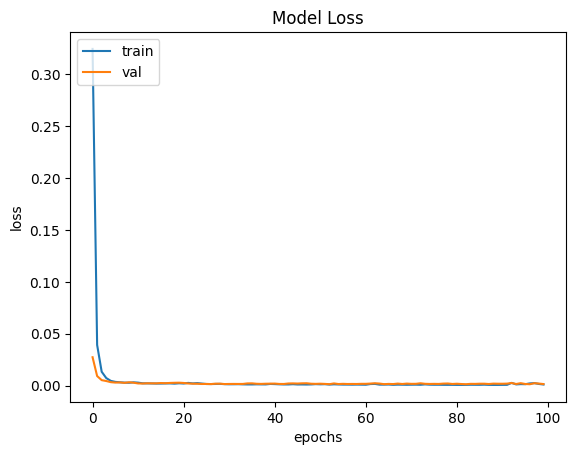

In [78]:
#summarize of training loss plot
plt.plot(f.history['loss'])
plt.plot(f.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','val'],loc='upper left')
plt.show()

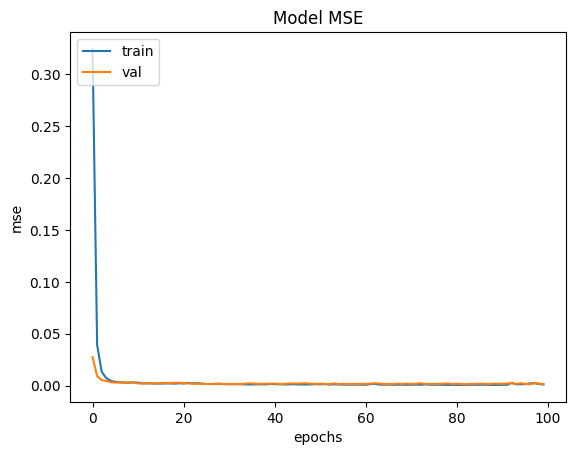

In [79]:
#summarize of training mse plot
plt.plot(f.history['mse'])
plt.plot(f.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(['train','val'],loc='upper left')
plt.show()

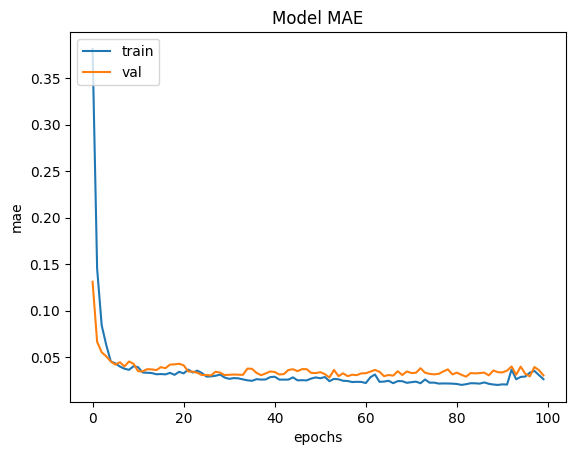

In [80]:
#summarize of training loss plot
plt.plot(f.history['mae'])
plt.plot(f.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epochs')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [81]:
print('Training data','-->','%s:%.4f%%'%(mod.metrics_names[0],scores_train[0]),';','%s:%.4f%%'%(mod.metrics_names[1],scores_train[1]),';','%s:%.4f%%'%(mod.metrics_names[2],scores_train[2]))
print('Testing data','-->','%s:%.4f%%'%(mod.metrics_names[0],scores_test[0]),';','%s:%.4f%%'%(mod.metrics_names[1],scores_test[1]),';','%s:%.4f%%'%(mod.metrics_names[2],scores_test[2]))

Training data --> loss:0.0015% ; mse:0.0015% ; mae:0.0296%
Testing data --> loss:0.0032% ; mse:0.0032% ; mae:0.0424%


In [82]:
#summary
mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1024      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11393 (44.50 KB)
Trainable params: 11393 (44.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
#prediction
yp=mod.predict(x_test)
print('Accuracy',':',r2_score(y_test,yp))

7/7 [==============================] - 0s 2ms/step
Accuracy : 0.9970391449261701


In [84]:
#Accuracy is 99%

# **Hyperparameter Tuning**

# **GridSearchCV Models**

# **1.Hyperparameter Tuning:Batch Size and Epochs**

In [85]:
!pip install tensorflow

In [86]:
!pip install scikeras

In [87]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

In [88]:
#create model1
def create_model1():
  model1=Sequential()
  model1.add(Dense(64,input_dim=7,kernel_initializer='uniform',activation='relu'))
  model1.add(Dense(32,kernel_initializer='uniform',activation='relu'))
  model1.add(Dense(10,kernel_initializer='uniform',activation='relu'))
  model1.add(Dense(1,kernel_initializer='uniform',activation='linear'))

  adam1=Adam(learning_rate=0.001)
  model1.compile(loss='mean_squared_error',optimizer=adam1,metrics=['mse','mae'])
  return model1


In [89]:
#Create GridSearchCV model1
kc1=KerasRegressor(build_fn=create_model1,verbose=0)
batch_size=[10,20,40]
epochs=[50,100,150]
params1=dict(batch_size=batch_size,epochs=epochs)
grid1=GridSearchCV(estimator=kc1,param_grid=params1,cv=KFold(),verbose=10)
grid1.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=50....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=50;, score=0.993 total time=   7.9s
[CV 2/5; 1/9] START batch_size=10, epochs=50....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=50;, score=0.996 total time=  11.4s
[CV 3/5; 1/9] START batch_size=10, epochs=50....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=50;, score=0.997 total time=   9.8s
[CV 4/5; 1/9] START batch_size=10, epochs=50....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=50;, score=0.997 total time=  13.4s
[CV 5/5; 1/9] START batch_size=10, epochs=50....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=50;, score=0.997 total time=  12.6s
[CV 1/5; 2/9] START batch_size=10, epochs=100...................................
[CV 1/5; 2/9] END ....batch_size=10, epochs=100;,

[CV 4/5; 7/9] END .....batch_size=40, epochs=50;, score=0.997 total time=   2.5s
[CV 5/5; 7/9] START batch_size=40, epochs=50....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=50;, score=0.996 total time=   2.4s
[CV 1/5; 8/9] START batch_size=40, epochs=100...................................
[CV 1/5; 8/9] END ....batch_size=40, epochs=100;, score=0.993 total time=   4.9s
[CV 2/5; 8/9] START batch_size=40, epochs=100...................................
[CV 2/5; 8/9] END ....batch_size=40, epochs=100;, score=0.996 total time=   7.3s
[CV 3/5; 8/9] START batch_size=40, epochs=100...................................
[CV 3/5; 8/9] END ....batch_size=40, epochs=100;, score=0.996 total time=   3.4s
[CV 4/5; 8/9] START batch_size=40, epochs=100...................................
[CV 4/5; 8/9] END ....batch_size=40, epochs=100;, score=0.997 total time=   5.5s
[CV 5/5; 8/9] START batch_size=40, epochs=100...................................
[CV 5/5; 8/9] END ....batch_size=40, epochs=100;, score=0.997 total time=   4.5s
[CV 1/5; 9/9] START batch_size=40, epochs=150...................................
[CV 1/5; 9/9] END ....batch_

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasRegressor(build_fn=<function create_model1 at 0x795dd8b63d00>, verbose=0),
             param_grid={'batch_size': [10, 20, 40], 'epochs': [50, 100, 150]},
             verbose=10)

In [90]:
print(grid1.best_score_)
print(grid1.best_params_)

0.9966431241793916
{'batch_size': 20, 'epochs': 150}


In [91]:
print('Best:{}  ,  Using:{}'.format(grid1.best_score_,grid1.best_params_))

Best:0.9966431241793916  ,  Using:{'batch_size': 20, 'epochs': 150}


In [92]:
#Accuracy is 99%

# **2.Hyperparameter Tuning:Learning rate and Dropout rate**

In [93]:
#create model2
def create_model2(learning_rate,dropout_rate):
  model2=Sequential()
  model2.add(Dense(64,input_dim=7,kernel_initializer='uniform',activation='relu'))
  model2.add(Dropout(dropout_rate))
  model2.add(Dense(32,kernel_initializer='uniform',activation='relu'))
  model2.add(Dropout(dropout_rate))
  model2.add(Dense(16,kernel_initializer='uniform',activation='relu'))
  model2.add(Dropout(dropout_rate))
  model2.add(Dense(10,kernel_initializer='uniform',activation='relu'))
  model2.add(Dropout(dropout_rate))
  model2.add(Dense(1,kernel_initializer='uniform',activation='linear'))

  adam2=Adam(learning_rate=learning_rate)
  model2.compile(loss='mean_squared_error',optimizer=adam2,metrics=['mse','mae'])
  return model2

In [94]:
#create GridSearchCV model2
kc2=KerasRegressor(build_fn=create_model2,verbose=0,dropout_rate=0.0,learning_rate=0.1,batch_size=15,epochs=50)
learning_rate=[0.1,0.01,0.001]
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
params2=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)
grid2=GridSearchCV(estimator=kc2,param_grid=params2,cv=KFold(),verbose=10)
grid2.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 1/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=-0.002 total time=   6.0s
[CV 2/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 2/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=0.963 total time=   8.0s
[CV 3/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 3/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=-0.045 total time=  13.2s
[CV 4/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 4/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=0.995 total time=  26.0s
[CV 5/5; 1/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 5/5; 1/18] END dropout_rate=0.0, learning_rate=0.1;, score=0.986 total time=  17.1s
[CV 1/5; 2/18] START dropout_rate=0.0, learning_rate=0.01.......................
[CV 1/5; 2/

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasRegressor(batch_size=15, build_fn=<function create_model2 at 0x795de5a77c70>, dropout_rate=0.0, epochs=50, learning_rate=0.1, verbose=0),
             param_grid={'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'learning_rate': [0.1, 0.01, 0.001]},
             verbose=10)

In [95]:
print(grid2.best_score_)
print(grid2.best_params_)

0.9959596538799966
{'dropout_rate': 0.0, 'learning_rate': 0.001}


In [96]:
print({'Best:{} , Using:{}'.format(grid2.best_score_,grid2.best_params_)})

{"Best:0.9959596538799966 , Using:{'dropout_rate': 0.0, 'learning_rate': 0.001}"}


In [97]:
#Accuracy is 99%

# **3.Hyperparameter Tuning:Kernel Initializer and Activation Function**

In [98]:
#create model3
def create_model3(initializer,activation):
  model3=Sequential()
  model3.add(Dense(64,input_dim=7,kernel_initializer=initializer,activation=activation))
  model3.add(Dropout(0.1))
  model3.add(Dense(32,kernel_initializer=initializer,activation=activation))
  model3.add(Dropout(0.1))
  model3.add(Dense(32,kernel_initializer=initializer,activation=activation))
  model3.add(Dropout(0.1))
  model3.add(Dense(10,kernel_initializer=initializer,activation=activation))
  model3.add(Dropout(0.1))
  model3.add(Dense(1,kernel_initializer='uniform',activation='linear'))

  adam3=Adam(learning_rate=0.001)
  model3.compile(loss='mean_squared_error',optimizer=adam3,metrics=['mse'])
  return model3

In [99]:
#create GridSearchCV model3
kc3=KerasRegressor(build_fn=create_model3,verbose=0,batch_size=20,epochs=50,activation='relu',initializer='uniform')
activation=['relu','tanh','linear','softmax']
initializer=['uniform','normal','zero']
params3=dict(activation=activation,initializer=initializer)
grid3=GridSearchCV(estimator=kc3,param_grid=params3,cv=KFold(),verbose=10)
grid3.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation=relu, initializer=uniform.......................
[CV 1/5; 1/12] END activation=relu, initializer=uniform;, score=0.991 total time=   3.5s
[CV 2/5; 1/12] START activation=relu, initializer=uniform.......................
[CV 2/5; 1/12] END activation=relu, initializer=uniform;, score=0.992 total time=   4.5s
[CV 3/5; 1/12] START activation=relu, initializer=uniform.......................
[CV 3/5; 1/12] END activation=relu, initializer=uniform;, score=0.993 total time=   3.8s
[CV 4/5; 1/12] START activation=relu, initializer=uniform.......................
[CV 4/5; 1/12] END activation=relu, initializer=uniform;, score=0.992 total time=   3.4s
[CV 5/5; 1/12] START activation=relu, initializer=uniform.......................
[CV 5/5; 1/12] END activation=relu, initializer=uniform;, score=0.997 total time=   7.1s
[CV 1/5; 2/12] START activation=relu, initializer=normal........................
[CV 1/5;

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasRegressor(activation='relu', batch_size=20, build_fn=<function create_model3 at 0x795dd8c032e0>, epochs=50, initializer='uniform', verbose=0),
             param_grid={'activation': ['relu', 'tanh', 'linear', 'softmax'],
                         'initializer': ['uniform', 'normal', 'zero']},
             verbose=10)

In [100]:
print(grid3.best_score_)
print(grid3.best_params_)

0.993061871964431
{'activation': 'relu', 'initializer': 'uniform'}


In [101]:
print('Best:{} , Using:{}'.format(grid3.best_score_,grid3.best_params_))

Best:0.993061871964431 , Using:{'activation': 'relu', 'initializer': 'uniform'}


In [102]:
#Accuracy is 99%

# **4.Hyperparameter Tuning:Number of neurons in activation layer**

In [103]:
#create model4
def create_model4(n1,n2,n3,n4):
  model4=Sequential()
  model4.add(Dense(n1,input_dim=7,kernel_initializer='uniform',activation='relu'))
  model4.add(Dropout(0.1))
  model4.add(Dense(n2,kernel_initializer='uniform',activation='relu'))
  model4.add(Dropout(0.1))
  model4.add(Dense(n3,kernel_initializer='uniform',activation='relu'))
  model4.add(Dropout(0.1))
  model4.add(Dense(n4,kernel_initializer='uniform',activation='relu'))
  model4.add(Dropout(0.1))
  model4.add(Dense(1,kernel_initializer='uniform',activation='linear'))

  adam4=Adam(learning_rate=0.001)
  model4.compile(loss='mean_squared_error',optimizer=adam4,metrics=['mse','mae'])
  return model4

In [104]:
#create GridSearchCV model4
kc4=KerasRegressor(build_fn=create_model4,verbose=0,batch_size=15,epochs=50,n1=64,n2=64,n3=32,n4=32)
n1=[64,32,16]
n2=[64,32,16]
n3=[32,16,8]
n4=[32,16,8]
params4=dict(n1=n1,n2=n2,n3=n3,n4=n4)
grid4=GridSearchCV(estimator=kc4,param_grid=params4,cv=KFold(),verbose=10)
grid4.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START n1=64, n2=64, n3=32, n4=32.................................
[CV 1/5; 1/81] END ..n1=64, n2=64, n3=32, n4=32;, score=0.993 total time=   4.6s
[CV 2/5; 1/81] START n1=64, n2=64, n3=32, n4=32.................................
[CV 2/5; 1/81] END ..n1=64, n2=64, n3=32, n4=32;, score=0.990 total time=   5.9s
[CV 3/5; 1/81] START n1=64, n2=64, n3=32, n4=32.................................
[CV 3/5; 1/81] END ..n1=64, n2=64, n3=32, n4=32;, score=0.994 total time=   6.8s
[CV 4/5; 1/81] START n1=64, n2=64, n3=32, n4=32.................................
[CV 4/5; 1/81] END ..n1=64, n2=64, n3=32, n4=32;, score=0.992 total time=  12.4s
[CV 5/5; 1/81] START n1=64, n2=64, n3=32, n4=32.................................
[CV 5/5; 1/81] END ..n1=64, n2=64, n3=32, n4=32;, score=0.994 total time=   6.7s
[CV 1/5; 2/81] START n1=64, n2=64, n3=32, n4=16.................................
[CV 1/5; 2/81] END ..n1=64, n2=64, n3=32, n4=16

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasRegressor(batch_size=15, build_fn=<function create_model4 at 0x795dd7627910>, epochs=50, n1=64, n2=64, n3=32, n4=32, verbose=0),
             param_grid={'n1': [64, 32, 16], 'n2': [64, 32, 16],
                         'n3': [32, 16, 8], 'n4': [32, 16, 8]},
             verbose=10)

In [105]:
print(grid4.best_score_)
print(grid4.best_params_)

0.9939231567821624
{'n1': 32, 'n2': 64, 'n3': 32, 'n4': 16}


In [106]:
print('Best:{} , Using:{}'.format(grid4.best_score_,grid4.best_params_))

Best:0.9939231567821624 , Using:{'n1': 32, 'n2': 64, 'n3': 32, 'n4': 16}


In [107]:
#Accuracy is 99%

In [108]:
####completed

**completed**